**Dependencies**

In [1]:
import sys
from obspy import UTCDateTime
from DataDownload import download_seismic_data
from DataProcessing import get_stream,data_processing, plot_graph
from EventIdentification import detect_earthquakes
from FindEarthquakesFromCatalogue import find_earthquakes


**Choosing 2024-04-03 For Testing (MW 7.4 Earthquake in Taiwan 23:58:11 April 2nd)**

In [13]:
date = UTCDateTime("2024-04-03")

**Choosing Station And Download**

In [14]:
station = ['GB', 'EDMD', 'IRIS']

# Try to download data and return availability for the date
data_available = download_seismic_data(date, station)

# Exit if data not available
if not data_available:
    print("Stopping execution due to no data available.")
    sys.exit()


Data for 2024-04-03 already downloaded.


**Original Stream**

1 Trace(s) in Stream:
GB.EDMD..HHZ | 2024-04-02T23:29:59.000000Z - 2024-04-04T00:30:01.000000Z | 100.0 Hz, 9000201 samples


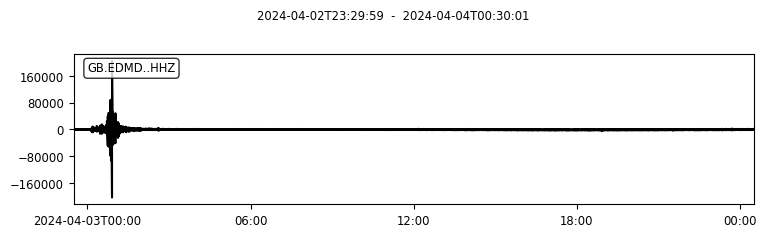

In [15]:
stream = get_stream(date, station)
print(stream)
plot_graph(stream)

**Pre-processing**

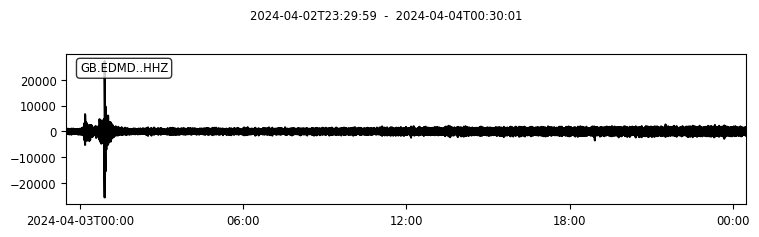

In [16]:
processed_stream = data_processing(stream)
plot_graph(processed_stream)

**Event Identification Using STA/ LTA**

In [17]:
sta_window = 1.9  # Short-time window in seconds
lta_window = 50.0  # Long-time window in seconds
threshold_on = 8.0  # STA/LTA threshold for triggering
threshold_off = 4.0  # STA/LTA threshold for turning off the trigger

earthquakes = detect_earthquakes(processed_stream, sta_window, lta_window, threshold_on, threshold_off)
for quake in earthquakes:
    print(f"Detected earthquake from {quake[0]} to {quake[1]}")

Detected earthquake from 2024-04-03T00:11:01.210000Z to 2024-04-03T00:11:03.280000Z
Detected earthquake from 2024-04-03T00:11:04.550000Z to 2024-04-03T00:11:06.690000Z
Detected earthquake from 2024-04-03T00:11:14.660000Z to 2024-04-03T00:11:19.560000Z
Detected earthquake from 2024-04-03T00:35:55.450000Z to 2024-04-03T00:35:56.780000Z
Detected earthquake from 2024-04-03T00:44:33.160000Z to 2024-04-03T00:44:35.170000Z
Detected earthquake from 2024-04-03T00:50:01.900000Z to 2024-04-03T00:50:03.790000Z
Detected earthquake from 2024-04-03T00:59:10.540000Z to 2024-04-03T00:59:12.710000Z
Detected earthquake from 2024-04-03T00:59:15.580000Z to 2024-04-03T00:59:18.230000Z
Detected earthquake from 2024-04-03T00:59:21.820000Z to 2024-04-03T00:59:23.340000Z
Detected earthquake from 2024-04-03T01:22:56.770000Z to 2024-04-03T01:22:57.960000Z
Detected earthquake from 2024-04-03T02:28:06.350000Z to 2024-04-03T02:28:07.710000Z
Detected earthquake from 2024-04-03T08:36:52.850000Z to 2024-04-03T08:36:56.

**Find Earthquake From Catalogue**

Number of Identified Earthquakes: 7
7 Event(s) in Catalog:
2024-04-03T02:14:36.448000Z | +24.197, +121.935 | 5.7  Mwr
2024-04-03T01:39:46.326000Z | +23.794, +121.788 | 5.6  Mwr
2024-04-03T00:46:44.212000Z | +24.146, +121.743 | 5.7  mb
2024-04-03T00:43:55.149000Z | +23.960, +121.595 | 5.5  mb
2024-04-03T00:35:36.724000Z | +24.161, +121.710 | 5.7  mb
2024-04-03T00:11:25.327000Z | +24.064, +121.672 | 6.4  Mww
2024-04-02T23:58:11.228000Z | +23.819, +121.562 | 7.4  mww


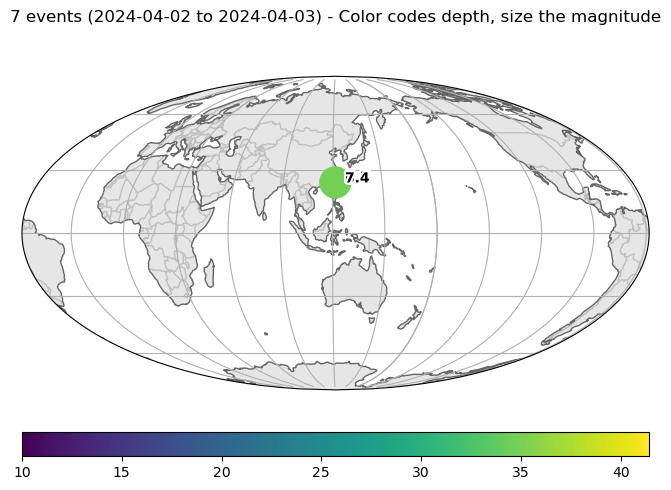

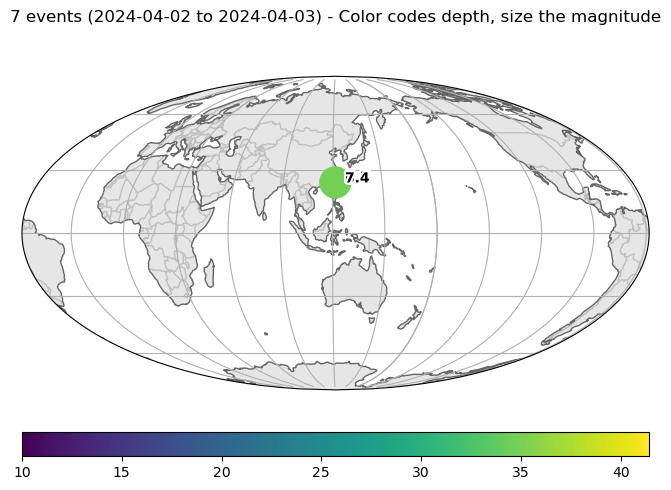

In [18]:
catalog = find_earthquakes(
    fromwhere="IRIS",
    latitude=54.76576577,
    longitude=-1.561623997,
    date = date,
    radmin=0,
    radmax=90,
    minmag=5.5,
    maxmag=10
)

# 输出检测到的地震数量
print('Number of Identified Earthquakes:', len(catalog))
# 可以选择打印出每个地震的详细信息或者其他处理
print(catalog) 
catalog.plot()  # Plotting the catalog